In [1]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import categorical_crossentropy
from keras.optimizers import RMSprop, Adam
from keras.metrics import Accuracy
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
from sklearn.neighbors import KNeighborsClassifier

from hoda_dataset import load_hoda

d:\Tehran Uni\Deep Learning\W.1\deep_learning_fashion_mnist\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
d:\Tehran Uni\Deep Learning\W.1\deep_learning_fashion_mnist\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
d:\Tehran Uni\Deep Learning\W.1\deep_learning_fashion_mnist\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 

array([[201, 201, 201, ..., 177, 176, 176],
       [201, 201, 201, ..., 177, 177, 176],
       [202, 202, 202, ..., 178, 177, 177],
       ...,
       [145, 145, 145, ..., 188, 187, 186],
       [144, 145, 144, ..., 188, 187, 186],
       [143, 144, 144, ..., 187, 187, 186]], shape=(525, 700), dtype=uint8)

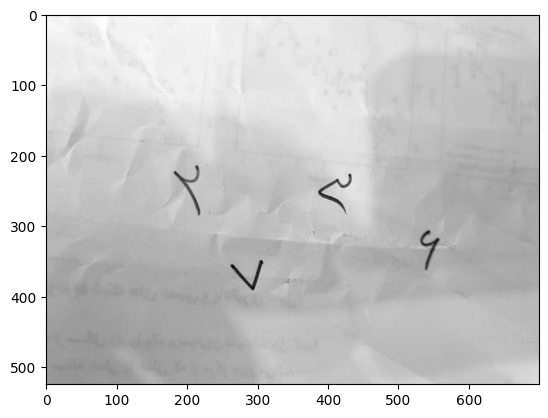

In [2]:
image = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
image

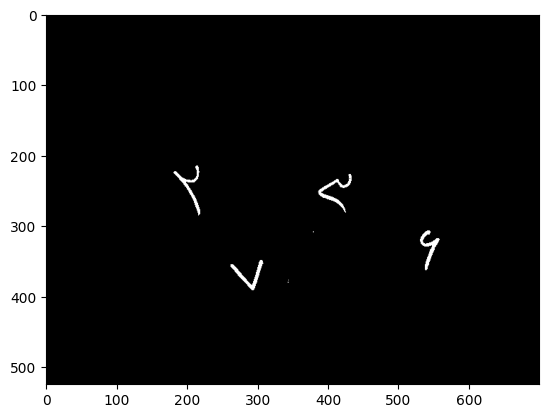

In [3]:
threshold, thresholed_image = cv2.threshold(image,128,255,cv2.THRESH_BINARY)
binary_image = 255-thresholed_image
plt.imshow(binary_image, cmap='gray')

In [4]:
retval_4, labels_4, stats_4, centroids_4 = cv2.connectedComponentsWithStats(binary_image,connectivity=4, ltype=cv2.CV_32S)
retval_8, labels_8, stats_8, centroids_8 = cv2.connectedComponentsWithStats(binary_image,connectivity=8, ltype=cv2.CV_32S)

In [5]:
array_of_components = []
for label in range(1, retval_4):
    x, y, w, h = stats_4[label][:4]
    # Crop the connected component using the bounding box
    connected_component = image[y:y+h, x:x+w]
    array_of_components.append(connected_component)

In [6]:
array_of_components = np.array(array_of_components, dtype=object)
array_of_components.shape

(7,)

In [7]:
for i in range(0,len(array_of_components)):
    width = len(array_of_components[i])
    height = max(len(a) for a in array_of_components[i])

    print(f"row: {width}, col:{height}")

row: 71, col:38
row: 55, col:48
row: 57, col:28
row: 2, col:1
row: 43, col:47
row: 1, col:1
row: 1, col:2


In [8]:
real_bjects = []
for i in range(0,len(array_of_components)):
    width = len(array_of_components[i])
    height = max(len(a) for a in array_of_components[i])

    if width > 5 and height > 5:
        print(f"have to put {i}")
        real_bjects.append(array_of_components[i])


have to put 0
have to put 1
have to put 2
have to put 4


In [9]:
real_bjects = np.array(real_bjects, dtype=object)
real_bjects.shape

(4,)

array([[178, 178, 177, ...,  72,  86, 173],
       [178, 177, 175, ...,  67,  67, 146],
       [177, 176, 174, ...,  65,  72, 115],
       ...,
       [179, 179, 175, ..., 181, 181, 180],
       [176, 177, 175, ..., 180, 184, 183],
       [173, 175, 176, ..., 178, 184, 183]], shape=(55, 48), dtype=uint8)

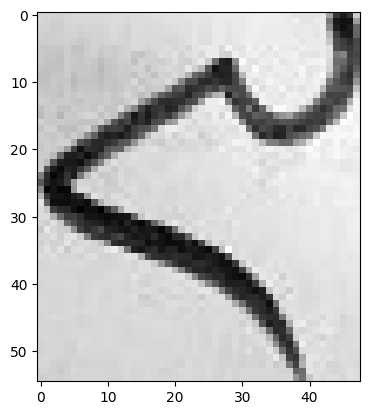

In [10]:
i = 1
plt.imshow(real_bjects[i], cmap='gray')
real_bjects[i]

train a model to understand the digits

In [11]:
X_train, Y_train, x_test, y_test = load_hoda(size=20)
X_train

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0, 159, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255, 255, 255],
       [ 96, 171, 255, ..., 255, 171,  96]],
      shape=(1000, 400), dtype=uint8)

In [12]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,Y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [13]:
all_predicted = neigh.predict(x_test)
all_predicted

array([7, 2, 3, 1, 5, 5, 4, 7, 3, 2, 0, 8, 8, 0, 2, 9, 3, 6, 7, 4, 0, 3,
       6, 3, 9, 2, 7, 5, 2, 9, 7, 5, 5, 8, 9, 6, 5, 1, 4, 8, 8, 4, 7, 7,
       1, 2, 7, 9, 0, 3, 7, 4, 7, 5, 2, 9, 8, 2, 9, 8, 8, 6, 6, 6, 6, 6,
       2, 4, 2, 4, 4, 5, 9, 1, 8, 3, 0, 5, 6, 2, 4, 3, 2, 7, 7, 7, 7, 1,
       8, 1, 7, 8, 7, 7, 8, 9, 3, 2, 3, 1, 0, 2, 9, 6, 3, 5, 5, 0, 0, 3,
       9, 7, 9, 3, 9, 9, 8, 7, 9, 2, 5, 2, 0, 5, 9, 6, 9, 2, 0, 3, 7, 6,
       5, 2, 9, 0, 4, 1, 8, 2, 2, 3, 0, 2, 9, 3, 8, 6, 7, 0, 9, 9, 0, 7,
       6, 1, 3, 7, 9, 3, 7, 0, 7, 1, 9, 4, 7, 3, 4, 1, 5, 6, 7, 9, 1, 3,
       5, 3, 5, 7, 4, 1, 3, 3, 1, 2, 3, 3, 8, 9, 6, 7, 7, 2, 3, 0, 1, 4,
       9, 5], dtype=uint8)

In [14]:
accuracy = np.mean(y_test == all_predicted)
print(f"accuracy: {accuracy*100}%")

accuracy: 96.5%


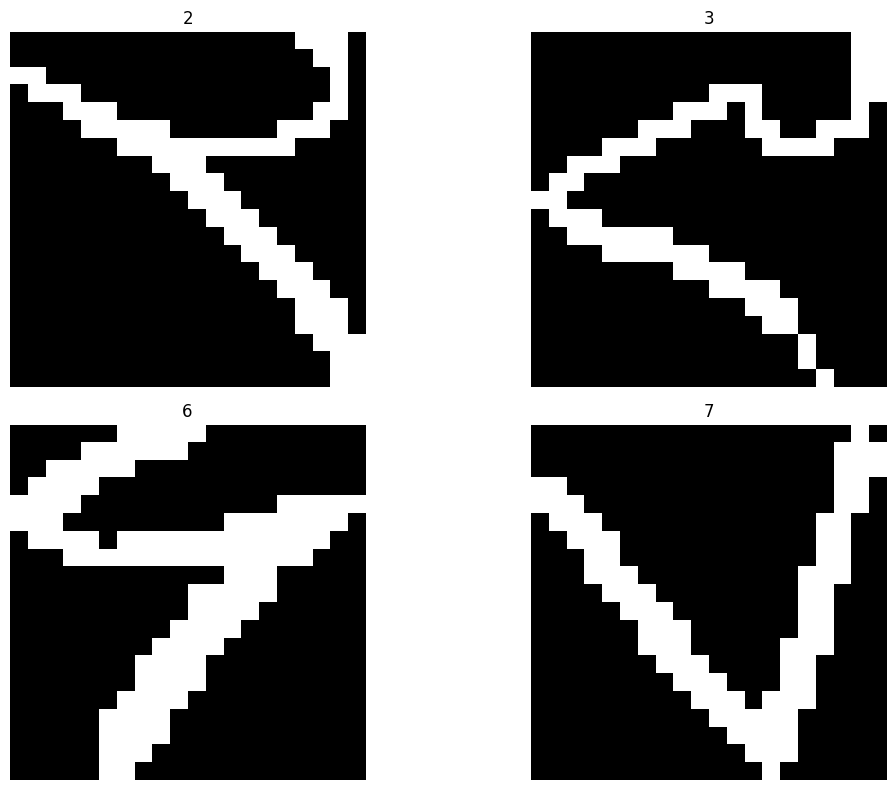

In [23]:
fig , axes = plt.subplots(2,2,figsize=(3*len(real_bjects),8))
axes = axes.flatten()

for component, ax in  zip(real_bjects,axes):
    resized = cv2.resize(component, dsize=(20,20))
    _, thresholed_image = cv2.threshold(resized,128,255,cv2.THRESH_BINARY)
    binary_image = 255 - thresholed_image
    flatten = np.reshape(binary_image, [-1,400])
    predicted = neigh.predict(flatten)[0]
    ax.imshow(binary_image, cmap='gray')
    ax.set_title(predicted, fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()